In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [68]:
weather_data = pd.DataFrame(pd.read_csv\
                            ("data_final/weather_avg_data.csv"))
weather_data = weather_data.drop("Unnamed: 0",1)

taxi_trip_counts = pd.DataFrame(pd.read_csv\
                                ("data_final/taxis_2011_2016.csv"))

taxi_trip_counts = taxi_trip_counts.drop("Unnamed: 0",1)

In [69]:
weather_data.columns.values

array(['weatheryear', 'weathermonth', 'weatherday', 'avg(SDWclean)',
       'avg(SDclean)', 'avg(SAclean)', 'avg(Spdclean)', 'avg(Visb)',
       'avg(Temp)'], dtype=object)

In [70]:
weather_data.shape

(2558, 9)

In [71]:
taxi_trip_counts.columns.values

array(['tripyear', 'tripmonth', 'tripday', 'count'], dtype=object)

In [72]:
taxi_trip_counts.shape

(1793, 4)

In [73]:
## get timestamp index for weather data
dayofdata_weather = []
for i in range(len(weather_data)):
    dayofdata_weather.append(datetime(int(weather_data["weatheryear"][i]), \
                              int(weather_data["weathermonth"][i]),\
                              int(weather_data["weatherday"][i])))
weather_data["dayofdata"] = dayofdata_weather
weather_data = weather_data.set_index("dayofdata",drop=True)    

In [74]:
weather_data.head()

,weatheryear,weathermonth,weatherday,avg(SDWclean),avg(SDclean),avg(SAclean),avg(Spdclean),avg(Visb),avg(Temp)
dayofdata,,,,,,,,,
2011-01-01,2011,1,1,1.0,4.212121,1.0,3.033333,11212.757576,3.293939
2011-01-02,2011,1,2,1.0,1.347826,1.0,2.347826,6513.043478,5.710870
2011-01-03,2011,1,3,1.0,0.093750,1.0,8.296875,16069.750000,1.118750
2011-01-04,2011,1,4,1.0,0.000000,1.0,4.243750,16069.750000,0.546875
2011-01-05,2011,1,5,1.0,0.000000,1.0,5.234375,16069.750000,1.662500


In [75]:
## get timestamp index for yellow taxi data
dayofdata_taxi = []
for i in range(len(taxi_trip_counts)):
    dayofdata_taxi.append(datetime(int(taxi_trip_counts["tripyear"][i]), \
                              int(taxi_trip_counts["tripmonth"][i]),\
                              int(taxi_trip_counts["tripday"][i])))
taxi_trip_counts["dayofdata"] = dayofdata_taxi
taxi_trip_counts = taxi_trip_counts.set_index("dayofdata",drop=True)  

In [76]:
taxi_trip_counts.head()

,tripyear,tripmonth,tripday,count
dayofdata,,,,
2011-01-01,2011,1,1,183030
2011-01-02,2011,1,2,158706
2011-01-03,2011,1,3,374927
2011-01-04,2011,1,4,407012
2011-01-05,2011,1,5,439070


In [77]:
data_merge = pd.DataFrame(pd.read_csv("data_final/data_firstmerge.csv"))
data_merge = data_merge.set_index("date",drop=True)

In [78]:
data_merge.index = pd.Series(data_merge.index).apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
# taxi_trip_counts.index = pd.Series(taxi_trip_counts.index).apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [79]:
data_final = data_merge.merge(taxi_trip_counts, how="inner",
                             left_on=data_merge.index.values, 
                              right_on=taxi_trip_counts.index.values)

In [80]:
data_final = data_final.set_index("key_0",drop=True)

In [81]:
data_final.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='key_0', length=1793, freq=None)

In [82]:
weather_data.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', name='dayofdata', length=2558, freq=None)

In [83]:
data_final = data_final.merge(weather_data, how="inner",
                             left_on=data_final.index.values,
                             right_on=weather_data.index.values)

In [84]:
data_final = data_final.set_index("key_0",drop=True)

In [94]:
## non-na
full_keys = list(data_final.isnull().any()[data_final.isnull().\
                                           any()==False].keys())

In [130]:
scaler = StandardScaler()
minmax = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data_final[full_keys]),\
                    columns=full_keys)
data = pd.DataFrame(minmax.fit_transform(data),\
                    columns=full_keys)

In [133]:
data = data[data["count"]>=0.07]
data.head()

,felonies,misdemeanors,violations,Temp,Spd,Prcp,tripyear,tripmonth,tripday,count,weatheryear,weathermonth,weatherday,avg(SDWclean),avg(SDclean),avg(SAclean),avg(Spdclean),avg(Visb),avg(Temp)
0,1.000000,0.946360,0.688623,0.355519,0.129189,0.000000,0.0,0.0,0.000000,0.278487,0.0,0.0,0.000000,0.0,0.190738,0.0,0.128790,0.663971,0.360497
1,0.189753,0.192529,0.281437,0.410916,0.069924,0.008581,0.0,0.0,0.033333,0.235322,0.0,0.0,0.033333,0.0,0.061034,0.0,0.072096,0.351756,0.413991
2,0.284630,0.262452,0.395210,0.309770,0.558375,0.010368,0.0,0.0,0.066667,0.619026,0.0,0.0,0.066667,0.0,0.004245,0.0,0.564103,0.986635,0.312353
3,0.352941,0.371648,0.473054,0.295729,0.220658,0.000000,0.0,0.0,0.100000,0.675964,0.0,0.0,0.100000,0.0,0.000000,0.0,0.228895,0.986635,0.299696
4,0.368121,0.423372,0.479042,0.319161,0.312127,0.000000,0.0,0.0,0.133333,0.732854,0.0,0.0,0.133333,0.0,0.000000,0.0,0.310824,0.986635,0.324388


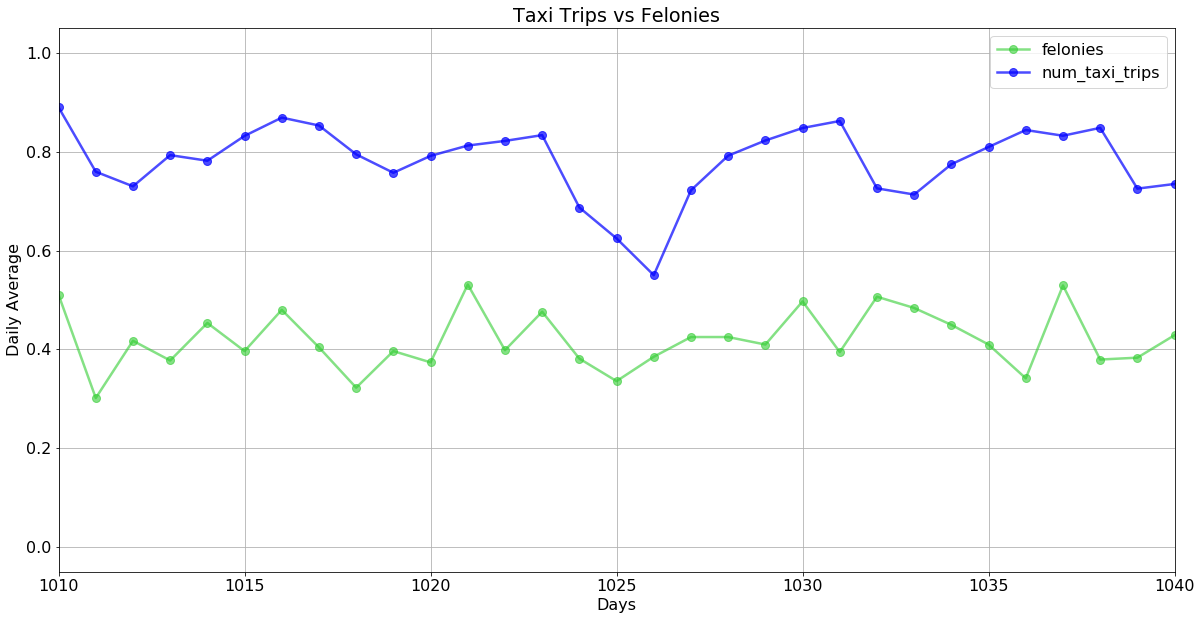

In [204]:
plt.figure(figsize=(20,10))
plt.plot(data["felonies"],label="felonies",color="limegreen",linewidth=2.5,alpha=0.6,marker="o",
        markersize=8,markerfacecolor=None)
# plt.plot(data["violations"],label="violations",color="b",linewidth=2.5,alpha=0.6,marker="o",
#         markersize=7,markerfacecolor=None)
plt.plot(data["count"],label="num_taxi_trips",linewidth=2.5,color="b",alpha=0.7,marker="o",
        markersize=8,markerfacecolor=None)
plt.xlim(1010,1040)
plt.legend()
plt.rcParams["font.size"] = 16
plt.title("Taxi Trips vs Felonies")
plt.ylabel("Daily Average")
plt.xlabel("Days")
plt.grid()


In [168]:
data_try = pd.DataFrame(pd.read_csv("data_final/data_firstmerge.csv"))

In [171]:
data_try = data_try.drop(["Temp","Spd","Prcp"],1)

In [173]:
data_try.isnull().all()

date                             False
felonies                         False
misdemeanors                     False
violations                       False
mean_duration                     True
num_trips                         True
Traffic Signal Condition         False
Cranes and Derricks              False
SAFETY                           False
ELECTRIC                         False
Tanning                          False
DOOR/WINDOW                      False
Comments                         False
Noise - Helicopter               False
STRUCTURAL                       False
Broken Parking Meter             False
Window Guard                     False
Broken Muni Meter                False
Highway Condition                False
Street Condition                 False
FLOORING/STAIRS                  False
Hazardous Materials              False
DOF Literature Request           False
Vending                          False
Ferry Permit                     False
PAINT - PLASTER          